# API Pagination

You've now worked with some API calls, but we have yet to see how to retrieve a more complete dataset in a programmatic manner. Returning to the Yelp API, the [documentation](https://www.yelp.com/developers/documentation/v3/business_search) also provides us details regarding the API limits. These often include details about the number of requests a user is allowed to make within a specified time limit and the maximum number of results to be returned. In this case, we are told that any request has a maximum of 50 results per request and defaults to 20. Furthermore, any search will be limited to a total of 1000 results. To retrieve all 1000 of these results, we would have to page through the results piece by piece, retriving 50 at a time. Processes such as these are often refered to as pagination. Without further ado, let's take a look in practice.

In [4]:
!pip install folium

    100% |████████████████████████████████| 81kB 10.9MB/s ta 0:00:01
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
import requests
import pandas as pd
import folium

In [6]:
# client_id = #your id here
api_key = 'QoeqP1NB8UHM0y8AR7fRA0SPvjDe8uBjjB5NU-tpC2B1BsmxyT6uvE7Aunioo-yHdc1etH0iOHVnbbaYgcHcvYGKYm8oYfWmCyJTTgkxiT85W4mjrUd6fgj7KljXW3Yx'

term = 'Mexican'
location = 'Astoria NY'
SEARCH_LIMIT = 10

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(api_key),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response = requests.get(url, headers=headers, params=url_params)
print(response)
print(type(response.text))
print(response.text[:1000])

<Response [200]>
<class 'str'>
{"businesses": [{"id": "jeWIYbgBho9vBDhc5S1xvg", "alias": "holy-guacamole-astoria", "name": "Holy Guacamole", "image_url": "https://s3-media3.fl.yelpcdn.com/bphoto/Di8o5LhA8pEK51sYr2rb2A/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/holy-guacamole-astoria?adjust_creative=X19lmGsWtd04EKsxxQ-0BQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=X19lmGsWtd04EKsxxQ-0BQ", "review_count": 127, "categories": [{"alias": "mexican", "title": "Mexican"}, {"alias": "bars", "title": "Bars"}], "rating": 4.0, "coordinates": {"latitude": 40.756621, "longitude": -73.929336}, "transactions": ["delivery", "pickup"], "price": "$$", "location": {"address1": "3555 31st St", "address2": "", "address3": "", "city": "Astoria", "zip_code": "11106", "country": "US", "state": "NY", "display_address": ["3555 31st St", "Astoria, NY 11106"]}, "phone": "+19178327261", "display_phone": "(917) 832-7261", "distance": 1290.4274875130448}, {"id": "AUyKmFjpa

# Previewing the Results

As before, let's briefly investigate the top level strucutre of our JSON response.

In [3]:
response.json().keys()

dict_keys(['businesses', 'total', 'region'])

Navigating down a level, we might be curious how many restaurants fit our criteria:

In [4]:
response.json()['total']

671

Now of those, we have only retrieved the first 10 results (the search limit we provided.) As the documentation describes, this defaults to 20, and can be up to 50. Observe:

In [5]:
print(len(response.json()['businesses']))

10


Recall that we can also turn this into our usual Pandas DataFrame:

In [6]:
df = pd.DataFrame(response.json()['businesses'])
print(len(df))
df.head()

10


,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,holy-guacamole-astoria,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...","{'latitude': 40.756621, 'longitude': -73.929336}",(917) 832-7261,1290.427488,jeWIYbgBho9vBDhc5S1xvg,https://s3-media1.fl.yelpcdn.com/bphoto/pMTc8Y...,False,"{'address1': '3555 31st St', 'address2': '', '...",Holy Guacamole,+19178327261,$$,4.0,127,"[delivery, pickup]",https://www.yelp.com/biz/holy-guacamole-astori...
1,chela-and-garnacha-astoria,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...","{'latitude': 40.7557171543477, 'longitude': -7...",(917) 832-6876,1316.297661,AUyKmFjpaVLwc3awfUnqgQ,https://s3-media1.fl.yelpcdn.com/bphoto/ChVbA1...,False,"{'address1': '33-09 36th Ave', 'address2': '',...",Chela & Garnacha,+19178326876,$$,4.5,312,"[delivery, pickup]",https://www.yelp.com/biz/chela-and-garnacha-as...
2,de-mole-astoria-astoria,"[{'alias': 'mexican', 'title': 'Mexican'}]","{'latitude': 40.7625999, 'longitude': -73.9129...",(718) 777-1655,918.092772,jzVv_21473lAMYXIhVbuTA,https://s3-media1.fl.yelpcdn.com/bphoto/v8jXvZ...,False,"{'address1': '4220 30th Ave', 'address2': '', ...",De Mole Astoria,+17187771655,$$,4.0,328,"[delivery, pickup]",https://www.yelp.com/biz/de-mole-astoria-astor...
3,mi-espiguita-taqueria-astoria,"[{'alias': 'mexican', 'title': 'Mexican'}]","{'latitude': 40.7612033639422, 'longitude': -7...",(718) 777-5648,714.301080,yvva7IYpD6J7OfKlCdQrkw,https://s3-media3.fl.yelpcdn.com/bphoto/_bPuQu...,False,"{'address1': '32-44 31st St', 'address2': '', ...",Mi Espiguita Taqueria,+17187775648,$,4.5,101,"[delivery, pickup]",https://www.yelp.com/biz/mi-espiguita-taqueria...
4,maizal-restaurant-and-tequila-bar-astoria-2,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...","{'latitude': 40.759331, 'longitude': -73.926035}",(718) 406-9431,900.451091,QIsFsiOP3H_NkgeWST7GPA,https://s3-media4.fl.yelpcdn.com/bphoto/VOGwDm...,False,"{'address1': '3207 34th Ave', 'address2': None...",Maizal Restaurant & Tequila Bar,+17184069431,$$,4.0,267,"[delivery, pickup]",https://www.yelp.com/biz/maizal-restaurant-and...


We could easily change our request slightly to retrieve a larger number at a time.

In [7]:
# client_id = #your id here
# api_key = #your key here

term = 'Mexican'
location = 'Astoria NY'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(api_key),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response = requests.get(url, headers=headers, params=url_params)
print(response)
print(type(response.text))
print(response.text[:1000])

<Response [200]>
<class 'str'>
{"businesses": [{"id": "jeWIYbgBho9vBDhc5S1xvg", "alias": "holy-guacamole-astoria", "name": "Holy Guacamole", "image_url": "https://s3-media1.fl.yelpcdn.com/bphoto/pMTc8Y0UnRFNh0zDFERfSg/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/holy-guacamole-astoria?adjust_creative=xNHtXRpNa-MXGFJJTHHUvw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=xNHtXRpNa-MXGFJJTHHUvw", "review_count": 127, "categories": [{"alias": "mexican", "title": "Mexican"}, {"alias": "bars", "title": "Bars"}], "rating": 4.0, "coordinates": {"latitude": 40.756621, "longitude": -73.929336}, "transactions": ["delivery", "pickup"], "price": "$$", "location": {"address1": "3555 31st St", "address2": "", "address3": "", "city": "Astoria", "zip_code": "11106", "country": "US", "state": "NY", "display_address": ["3555 31st St", "Astoria, NY 11106"]}, "phone": "+19178327261", "display_phone": "(917) 832-7261", "distance": 1290.4274875130448}, {"id": "AUyKmFjpa

We still have the same number of matching results, but this time have been given the first 50:

In [8]:
response.json()['total']

671

In [9]:
print(len(response.json()['businesses']))

50


If we want to retrieve more of the results, we page through them by using the offset parameter:

In [10]:
# client_id = #your id here
# api_key = #your key here

term = 'Mexican'
location = 'Astoria NY'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(api_key),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT,
                'offset': 50
            }
response2 = requests.get(url, headers=headers, params=url_params)
print(response2)
print(type(response2.text))
print(response2.text[:1000])

<Response [200]>
<class 'str'>
{"businesses": [{"id": "DY2wlHlgC5eHITs-d5rT4w", "alias": "panchos-new-york-2", "name": "Panchos", "image_url": "https://s3-media2.fl.yelpcdn.com/bphoto/vwfG2x08lpXbqe3sybnT-Q/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/panchos-new-york-2?adjust_creative=xNHtXRpNa-MXGFJJTHHUvw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=xNHtXRpNa-MXGFJJTHHUvw", "review_count": 54, "categories": [{"alias": "mexican", "title": "Mexican"}, {"alias": "breakfast_brunch", "title": "Breakfast & Brunch"}], "rating": 4.5, "coordinates": {"latitude": 40.8015, "longitude": -73.96534}, "transactions": [], "price": "$", "location": {"address1": "964 Amsterdam Ave", "address2": "", "address3": "", "city": "New York", "zip_code": "10025", "country": "US", "state": "NY", "display_address": ["964 Amsterdam Ave", "New York, NY 10025"]}, "phone": "+12123165400", "display_phone": "(212) 316-5400", "distance": 5288.3093583250375}, {"id": "bHJWjEg_sGj

# Practice

With that, you should have the basics to retrive the full result set!

## API Call Function

Use the example above to write a function to retrieve all of the results (up to the maximum 1000 provided by Yelp) for a given search. Your function should then return the results for these as a single Pandas dataframe.

In [7]:
#Your code here
import time

def yelp_call(url_params, api_key):
    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    
    df = pd.DataFrame(response.json()['businesses'])
    return df

def all_results(url_params, api_key):
    num = response.json()['total']
    cur = 0
    dfs = []
    while cur < num and cur < 1000:
        url_params['offset'] = cur
        dfs.append(yelp_call(url_params, api_key))
        time.sleep(5)
        cur += 50
    df = pd.concat(dfs, ignore_index=True)
    return df

In [ ]:
time.sleep()


### Pseudocode outline: 

The function should take in url paramaters in some form. From there, the first call should check the number of results and make successive API calls using the offset parameter to cycle through these results. Each response should be stored as a DataFrame which will then be stitched together.

Warning: Making too many API calls can lead to errors. Most APIs require you to slow down your requests to a manageable limit. Make sure to use the time.sleep() method from the time package to make some brief pauses (~5 seconds is more then sufficient) between successive calls.

## Neighborhood ______ Restaurants

Use your function above to retrieve all of the restaurants for a particular cuisine in a neighborhood of your choice.

In [8]:
#Your code here
term = 'Mexican'
location = 'Astoria NY'
url_params = {  'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit' : 50
             }
df = all_results(url_params, api_key)
print(len(df))
df.head()

672


,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,holy-guacamole-astoria,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...","{'latitude': 40.756621, 'longitude': -73.929336}",(917) 832-7261,1290.427488,jeWIYbgBho9vBDhc5S1xvg,https://s3-media3.fl.yelpcdn.com/bphoto/Di8o5L...,False,"{'address1': '3555 31st St', 'address2': '', '...",Holy Guacamole,+19178327261,$$,4.0,127,"[delivery, pickup]",https://www.yelp.com/biz/holy-guacamole-astori...
1,chela-and-garnacha-astoria,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...","{'latitude': 40.7557171543477, 'longitude': -7...",(917) 832-6876,1316.297661,AUyKmFjpaVLwc3awfUnqgQ,https://s3-media1.fl.yelpcdn.com/bphoto/ChVbA1...,False,"{'address1': '33-09 36th Ave', 'address2': '',...",Chela & Garnacha,+19178326876,$$,4.5,312,"[delivery, pickup]",https://www.yelp.com/biz/chela-and-garnacha-as...
2,de-mole-astoria-astoria,"[{'alias': 'mexican', 'title': 'Mexican'}]","{'latitude': 40.7625999, 'longitude': -73.9129...",(718) 777-1655,918.092772,jzVv_21473lAMYXIhVbuTA,https://s3-media1.fl.yelpcdn.com/bphoto/v8jXvZ...,False,"{'address1': '4220 30th Ave', 'address2': '', ...",De Mole Astoria,+17187771655,$$,4.0,329,"[delivery, pickup]",https://www.yelp.com/biz/de-mole-astoria-astor...
3,mi-espiguita-taqueria-astoria,"[{'alias': 'mexican', 'title': 'Mexican'}]","{'latitude': 40.7612033639422, 'longitude': -7...",(718) 777-5648,714.301080,yvva7IYpD6J7OfKlCdQrkw,https://s3-media3.fl.yelpcdn.com/bphoto/_bPuQu...,False,"{'address1': '32-44 31st St', 'address2': '', ...",Mi Espiguita Taqueria,+17187775648,$,4.5,101,"[delivery, pickup]",https://www.yelp.com/biz/mi-espiguita-taqueria...
4,maizal-restaurant-and-tequila-bar-astoria-2,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...","{'latitude': 40.759331, 'longitude': -73.926035}",(718) 406-9431,900.451091,QIsFsiOP3H_NkgeWST7GPA,https://s3-media4.fl.yelpcdn.com/bphoto/VOGwDm...,False,"{'address1': '3207 34th Ave', 'address2': None...",Maizal Restaurant & Tequila Bar,+17184069431,$$,4.0,267,"[delivery, pickup]",https://www.yelp.com/biz/maizal-restaurant-and...


## Exploratory Analysis

Take the restaurants from the previous question and do an intial exploratory analysis. At minimum, this should include looking at the distribution of features such as price, rating and number of reviews as well as the relations between these dimensions.

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df.price = df.price.fillna(value=0)
price_dict = {"$": 1, "$$":2, "$$$": 3, "$$$$":4}
df.price = df.price.map(price_dict)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f001235ec88>,
      dtype=object)

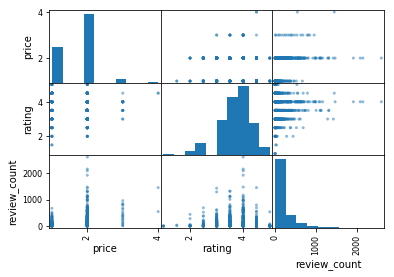

In [11]:
pd.plotting.scatter_matrix(df[['price', 'rating', 'review_count']])

## Mapping

Look at the initial Yelp example and try and make a map using Folium of the restaurants you retrieved.

In [ ]:
#Your code here